# ODS NLP Cource: Seminar 02 - LogReg, TFiDF, Классификация

Что почитать:
- [Яндекс учебник](https://education.yandex.ru/handbook/ml/article/linear-models)
- [ШАД-конспект по Classic ML](https://t.me/dimension_ai/164)

# [1] Линейные модели

## [1.1] Задача регрессии: Линейная регрессия

### [1.1.1] Постановка задачи

Давайте предскажем поведение линейной функции
$$y = 2x_1 + 5x_2 - 3$$

Линейное уравнение от нескольких переменных для $k$-того наблюдения будет выглядеть следующим образом:
$$y^{[k]} = x^{[k]}_1 \cdot w_1 + \dots + x^{[k]}_m \cdot w_m + b$$

это же уравнение в векторной форме через **скалярное произведение**:
$$y^{[k]} = {\bf x}^{[k]} \cdot {\bf w} + b$$

это же уравнение в матричной форме через **матричное произведение**:
$$y^{[k]} = X^{[k]}_{[1;\ m]} \times W_{[m;\ 1]} + b$$

это же уравнение при обобщении до всех $\bf*$ наблюдений причём по $t$ различным таргетам:
$${Y}_{[*;\ t]} = {X}_{[*;\ m]} \times {W}_{[m;\ t]} + {b}_{[*;\ t]}$$

In [1]:
import numpy as np

In [57]:
# заданные параметры
W_true = [[2], [5]]
b_true = [[-3]]

# сгенерированные наблюдения
np.random.seed(42)
X = np.random.randint(low=-20, high=20, size=(20, len(W_true))) + 0.0
y = X @ W_true + b_true
X.T, y.T

(array([[ 18.,  -6.,   0.,  -2., -10.,   3.,  19., -18., -19.,   9., -19.,
          12.,   1.,   6.,  -5., -18., -14., -12.,  -3.,   4.],
        [  8., -13.,  18.,   2., -10.,  15.,   3.,   1.,   3.,  17.,   0.,
          -9.,   4.,   7.,  -6.,  16.,   0.,  18., -17.,  -7.]]),
 array([[ 73., -80.,  87.,   3., -73.,  78.,  50., -34., -26., 100., -41.,
         -24.,  19.,  44., -43.,  41., -31.,  63., -94., -30.]]))

Вклад параметра в ошбику рассмотрим через взятие частной производной
$$ \frac{\Delta L}{\Delta p} ≈
\frac{\partial L}{\partial p} =
\frac{\partial L}{\partial \bar{y}}
\frac{\partial \bar{y}}{\partial p} =
L^{'}_{\bar{y}} \cdot \frac{\partial \bar{y}}{\partial p}
$$

Соответвенно производные по $b$ и $w_i$:
$$ \begin{align}
\frac{\partial L}{\partial b} &= L^{'}_{\bar{y}} \cdot 1 \\
\frac{\partial L}{\partial w_i} &= L^{'}_{\bar{y}} \cdot x_i
\end{align}
$$

В матричном виде получится:
$$ \begin{align}
\frac{\partial L}{\partial b}_{[*;\ t]} &= {L^{'}_{\bar{Y}}}_{[*;\ t]}\\
\frac{\partial L}{\partial W}_{[m;\ t]} &= X^T_{[m;\ *]} \times {L^{'}_{\bar{Y}}}_{[*;\ t]}
\end{align}
$$




In [58]:
def equation(w=np.array([2, 5]), b=np.array(3)):
    return (
        "y = "
        + " + ".join(f"{w[i].item():.2f}*x{i+1}" for i in range(len(w)))
        + f" + {b.item():.2f}"
    )


equation()

'y = 2.00*x1 + 5.00*x2 + 3.00'

### [1.1.2] NumPy решение

In [59]:
# сгенерированные данные
np.random.seed(42)
W_true = np.array([[2], [5]])
b_true = -3
X = np.random.randint(-20, 20, (20, len(W_true))) + 0.0
y = X @ W_true + b_true


def np_train(X, y, lr=0.005, max_iter=1000):
    # предсказываемые параметры
    W = np.zeros((X.shape[-1], y.shape[-1]))
    b = np.zeros((1, y.shape[-1]))

    for i in range(1, max_iter + 1):
        # предсказание и ошибка
        y_pred = X @ W + b
        loss = np.sum((y_pred - y) ** 2) / len(y)

        # расчёт градиентов
        L_grad = (2 / len(y)) * (y_pred - y)
        b_grad = np.sum(L_grad)
        W_grad = np.sum(X.T @ L_grad, axis=1, keepdims=True)

        # шаг градиента
        W -= lr * W_grad
        b -= lr * b_grad

        # прогресс
        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep="\t")


np_train(X, y)

step   1:	y = 2.90*x1 + 5.65*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423337
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236051
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039147
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


### [1.1.3] Torch решение

In [60]:
import torch

In [61]:
# сгенерированные данные
X = torch.tensor(X).to(torch.float32)
y = X @ W_true + b_true


def torch_train(X, y, lr=0.005, max_iter=1000):
    # предсказываемые параметры
    W = torch.zeros(X.shape[1], y.shape[1], requires_grad=True)
    b = torch.zeros(y.shape[1], requires_grad=True)

    for i in range(1, max_iter + 1):
        # предсказание и ошибка
        y_pred = X @ W + b
        loss = torch.mean((y_pred - y) ** 2)

        # расчёт градиентов
        loss.backward()

        with torch.no_grad():
            # шаг градиента
            W -= lr * W.grad
            b -= lr * b.grad

            # обнуление накопленного градиента (inplace)
            W.grad.zero_()
            b.grad.zero_()

        # прогресс
        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep="\t")


torch_train(X, y)

step   1:	y = 2.90*x1 + 5.64*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423338
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236050
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039148
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


## [1.2] Задача классификации: Логистическая регрессия

### [1.2.1] Анализ данных

In [63]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [64]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


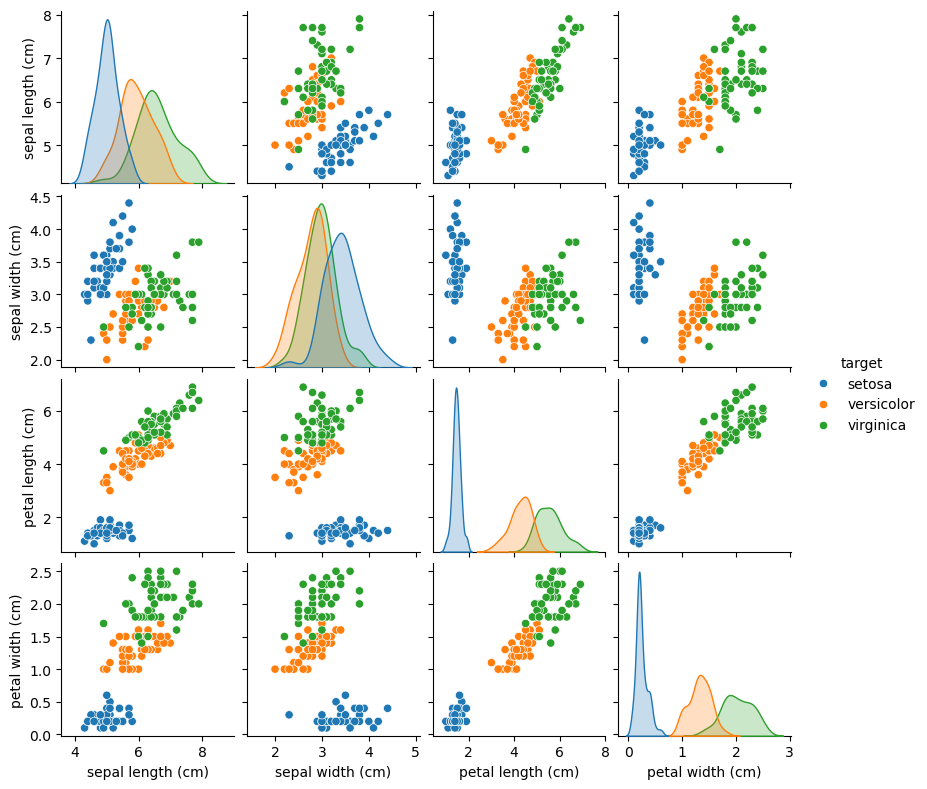

In [67]:
import seaborn as sns

sns.pairplot(df, hue="target", height=2)

### [1.2.2] Scikit-learn решение

In [69]:
# from sklearn.model_selection import train_test_split


def train_test_split(*args, test_size=0.33, random_state=42) -> tuple[torch.Tensor]:
    torch.manual_seed(random_state)
    idx = torch.randperm(n := args[0].shape[0])
    test = round(n * test_size)
    return tuple(
        torch.Tensor(result)
        for arg in args
        for result in (arg[idx[:-test]], arg[idx[-test:]])
    )


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[y != 2], y[y != 2][:, None])
y_train.T, y_test.T

(tensor([[0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
          1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
          1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
          1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.]]))

In [70]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train.ravel())
equation(clf.coef_.T, clf.intercept_)

'y = 0.41*x1 + -0.90*x2 + 2.09*x3 + 0.86*x4 + -5.76'

### [1.2.3] Torch классификатор

**SoftMax**

Для классификации нужно как-то принимать решение, например, через уверенность от 0 до 1

Например, SoftMax для $k$-классов определяется :
$$\begin{align}
\text{SoftMax}(z_i) = \frac{e^{z_i}}{e^{z_1} + \dots + e^{z_k}}
\end{align}$$

*не трудно заметить что:
- $\text{SoftMax}(z_1) + \dots + \text{SoftMax}(z_k) = 1$
- $\text{SoftMax}(z_i) \in [0, 1]$

**Sigmoid**

Softmax можно использовать и для 2 классов:
$$\text{SoftMax}(z_1) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}} = \frac{1}{1 + e^{z_2-z_1}}$$

Но для 2-х классов достаточно предсказать лишь один класс

Т.е. если положить $z_2 = 0$ то получим Sigmoid:
$$\text{Sigmoid}(z) = \frac{1}{1 + e^{-z}}$$

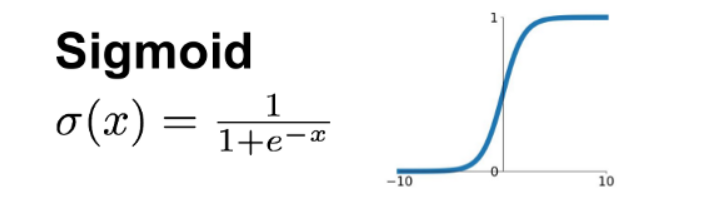

Максимизация правдоподобия
$$likehood = ∏ [y_{pred}=1]^{[y_{real}=1]} [y_{pred}=0]^{[y_{real}=0]}$$
$$likehood = ∏ {y_{pred}}^{y_{real}} (1-y_{pred})^{1-y_{real}}$$
$$log\_likehood = Σ \log({y_{pred}}^{y_{real}}) + \log((1-y_{pred})^{1-y_{real}})$$
$$log\_likehood\_loss = - Σ \log({y_{pred}}^{y_{real}}) - \log((1-y_{pred})^{1-y_{real}})$$

In [71]:
class LogisticRegression2:
    def __init__(self):
        pass

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + torch.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.W + self.b)

    def predict(self, X, threshold=0.5):  # по классам
        with torch.no_grad():
            proba = self.predict_proba(torch.Tensor(X))
            return (proba > threshold).to(int)

    def score(self, X, y):
        return (self.predict(X_test) == y_test).to(float).mean().item()

    @staticmethod
    def loss(y_true, y_pred):
        return -(
            y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)
        ).mean()

    def fit(self, X, y, lr=0.5, max_iter=1000):
        # предсказываемые параметры
        self.W = torch.ones(X.shape[1], y.shape[1], requires_grad=True)
        self.b = torch.zeros(y.shape[1], requires_grad=True)

        for i in range(1, max_iter + 1):
            # предсказание и ошибка
            y_pred = self.predict_proba(X)
            loss = self.loss(y, y_pred)

            # расчёт градиентов
            loss.backward()

            with torch.no_grad():
                # шаг градиента
                self.W -= lr * self.W.grad
                self.b -= lr * self.b.grad

                # обнуление накопленного градиента (inplace)
                self.W.grad.zero_()
                self.b.grad.zero_()

            # прогресс
            if i == 1 or i % 10 == 0:
                print(
                    f"step {i:3}:",
                    equation(self.W, self.b),
                    f"loss: {loss.item():.4f}",
                    f"acc: {self.score(X, y):.4f}",
                    sep="\t",
                )

In [72]:
clf2 = LogisticRegression2()
clf2.fit(X_train, y_train, max_iter=100)

step   1:	y = -0.20*x1 + 0.16*x2 + 0.65*x3 + 0.94*x4 + -0.24	loss: 4.9028	acc: 0.4545
step  10:	y = -0.56*x1 + -0.69*x2 + 1.60*x3 + 1.35*x4 + -0.39	loss: 0.0801	acc: 1.0000
step  20:	y = -0.56*x1 + -0.84*x2 + 1.84*x3 + 1.45*x4 + -0.40	loss: 0.0424	acc: 1.0000
step  30:	y = -0.59*x1 + -0.96*x2 + 2.00*x3 + 1.52*x4 + -0.42	loss: 0.0325	acc: 1.0000
step  40:	y = -0.60*x1 + -1.06*x2 + 2.13*x3 + 1.58*x4 + -0.43	loss: 0.0264	acc: 1.0000
step  50:	y = -0.62*x1 + -1.13*x2 + 2.24*x3 + 1.62*x4 + -0.45	loss: 0.0223	acc: 1.0000
step  60:	y = -0.63*x1 + -1.20*x2 + 2.33*x3 + 1.66*x4 + -0.45	loss: 0.0193	acc: 1.0000
step  70:	y = -0.64*x1 + -1.26*x2 + 2.41*x3 + 1.70*x4 + -0.46	loss: 0.0171	acc: 1.0000
step  80:	y = -0.65*x1 + -1.31*x2 + 2.48*x3 + 1.73*x4 + -0.47	loss: 0.0153	acc: 1.0000
step  90:	y = -0.66*x1 + -1.36*x2 + 2.55*x3 + 1.76*x4 + -0.48	loss: 0.0139	acc: 1.0000
step 100:	y = -0.66*x1 + -1.40*x2 + 2.60*x3 + 1.78*x4 + -0.48	loss: 0.0127	acc: 1.0000


<Axes: >

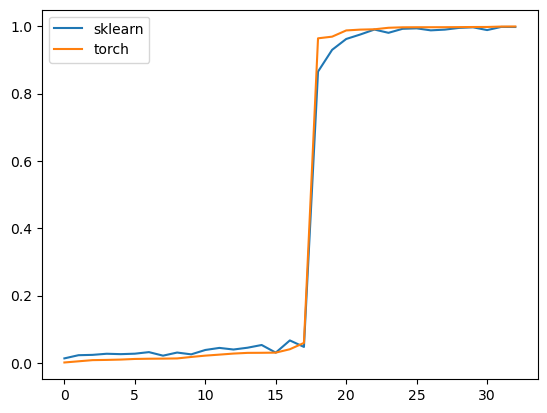

In [73]:
df_pred = pd.DataFrame(
    {
        "sklearn": clf.predict_proba(X_test)[:, 1],
        "torch": clf2.predict_proba(X_test)[:, 0].detach().numpy(),
    }
)

df_pred.sort_values(by="torch").reset_index(drop=True).plot()

### [1.2.4] Torch пайплайн

In [75]:
y_encoded = (np.unique(y)[None, :] == y[:, None]) + 0.0
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

In [76]:
class TorchLogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs=1):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=n_inputs, out_features=n_outputs)

    def forward(self, X):
        # return torch.sigmoid(self.linear(X), dim=1)
        return torch.softmax(self.linear(X), dim=1)

    def score(self, X, y):
        y_pred = torch.argmax(self(X), dim=1)
        y_true = torch.argmax(y, dim=1)
        return (y_true == y_pred).to(float).mean().item()


model = TorchLogisticRegression(X.shape[1], y_encoded.shape[1])

In [77]:
def torch_train(model, X, y, lr=0.005, max_iter=4000):
    # loss_function = torch.nn.BCELoss()
    loss_function = torch.nn.CrossEntropyLoss()

    # предсказываемые параметры
    optimizer = torch.optim.SGD(model.parameters(), lr)

    for i in range(1, max_iter + 1):
        # предсказание и ошибка
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        # расчёт градиентов
        loss.backward()

        # шаг градиента
        optimizer.step()
        # обнуление накопленного градиента
        optimizer.zero_grad()

        # прогресс
        if i == 1 or i % 1000 == 0:
            print(
                f"step {i:3}:",
                f"loss: {loss.item():.4f}",
                f"acc: {model.score(X, y):.2f}",
                sep="\t",
            )


torch_train(model, X_train, y_train)
print("Test acc:", model.score(X_test, y_test))

step   1:	loss: 1.1873	acc: 0.29
step 1000:	loss: 0.8702	acc: 0.67
step 2000:	loss: 0.8113	acc: 0.81
step 3000:	loss: 0.7793	acc: 0.98
step 4000:	loss: 0.7558	acc: 0.99
Test acc: 0.92


In [79]:
y_pred = model.linear(X_test)

# [2] Метрики качества
- [Яндекс учебник: метрики](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)

## [2.1] Бинарная классификация

### [2.1.1] Accuracy
- проще и корректнее запомнить как число совпадений
- нередко встречается точность, но лучше так не говорить

$$Accuracy = \frac{[y_{real}==y_{pred}]}{[y_{pred}]} = \frac{правильные\ предсказания}{все\ предсказания}$$

In [80]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

### [2.1.2] Precision & Recall

Задача может стоять так, что нас интересует предсказание только метки «$+$»

Тогда выделяется две метрики:
- **Precision** — точность, точечное прицеливание (как прививка)
- **Recall** – полнота, полное решение проблемы (как антибиотик)


$$Precision = \frac{TP}{TP+FP} = \frac{TP}{[y_{pred}^+]} = \frac{[y_{real}^+==y_{pred}^+]}{[y_{pred}^+]} = \frac{правильно\ предсказанные\ +}{все\ предсказанные\ +}$$
$$Recall = \frac{TP}{TP+FN} = \frac{TP}{[y_{real}^+]} = \frac{[y_{real}^+==y_{pred}^+]}{[y_{real}^+]} = \frac{правильно\ предсказанные\ +}{все\ реальные\ +}$$


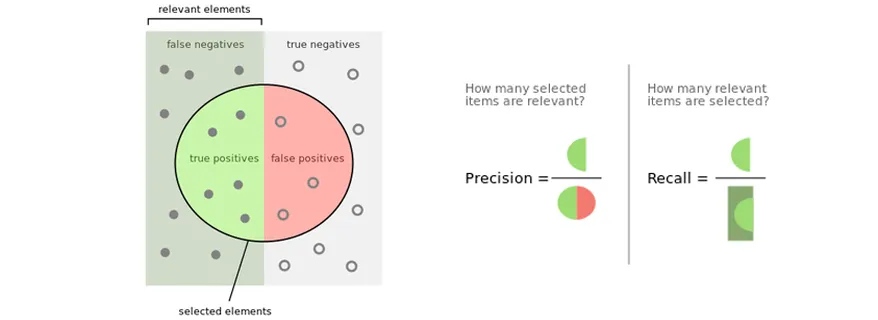

In [81]:
def precision(y_real, y_pred):
    return (y_real * y_pred).sum() / y_pred.sum()

In [82]:
def recall(y_real, y_pred):
    return (y_real * y_pred).sum() / y_real.sum()

### [2.1.3] F-score

Возникает желание минимизировать обе метрики

Можно сделать среднее арифметическое, но такой подсчёт приравняет следующие ситуации:
- $Precision≈0, Recall≈1$
- $Precision≈0.5, Recall≈0.5$
- $Precision≈1, Recall≈0$

Что это могут быть за ситуации и почему плохо что они приравнены?

Универсальным решением считается **среднее гармоническое**

$$F_1{score} = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = \frac{2\  Precision\ Recall}{Precision+{Recall}} = \frac{2\ (правильно\ предсказанные\ +)}{(все\ реальные\ +) + (все\ предсказанные\ +)}$$

In [83]:
def f1_score(y_real, y_pred):
    return 2 * (y_real * y_pred).sum() / (y_real.sum() + y_pred.sum())

Обобщением $F_1 score$ считается взвешенный $F_𝛽score$

$$F_{score} = \frac{2}{\frac{𝛽^2}{1+𝛽^2}\frac{1}{Recall}+\frac{1}{1+𝛽^2}\frac{1}{Precision}} = (1+𝛽^2) \frac{\ Precision\ Recall}{𝛽^2 Precision+Recall} = \frac{(1+𝛽^2)\ (правильно\ предсказанные\ +)}{𝛽^2(все\ реальные\ +) + (все\ предсказанные\ +)}$$
- $𝛽 \nearrow^ \infty$ — остаётся только $Recall$
- $𝛽 \searrow_0$ — остаётся только $Precision$


In [84]:
def fb_score(y_real, y_pred, b=1):
    return (1 + b * b) * (y_real * y_pred).sum() / (b * b * y_real.sum() + y_pred.sum())

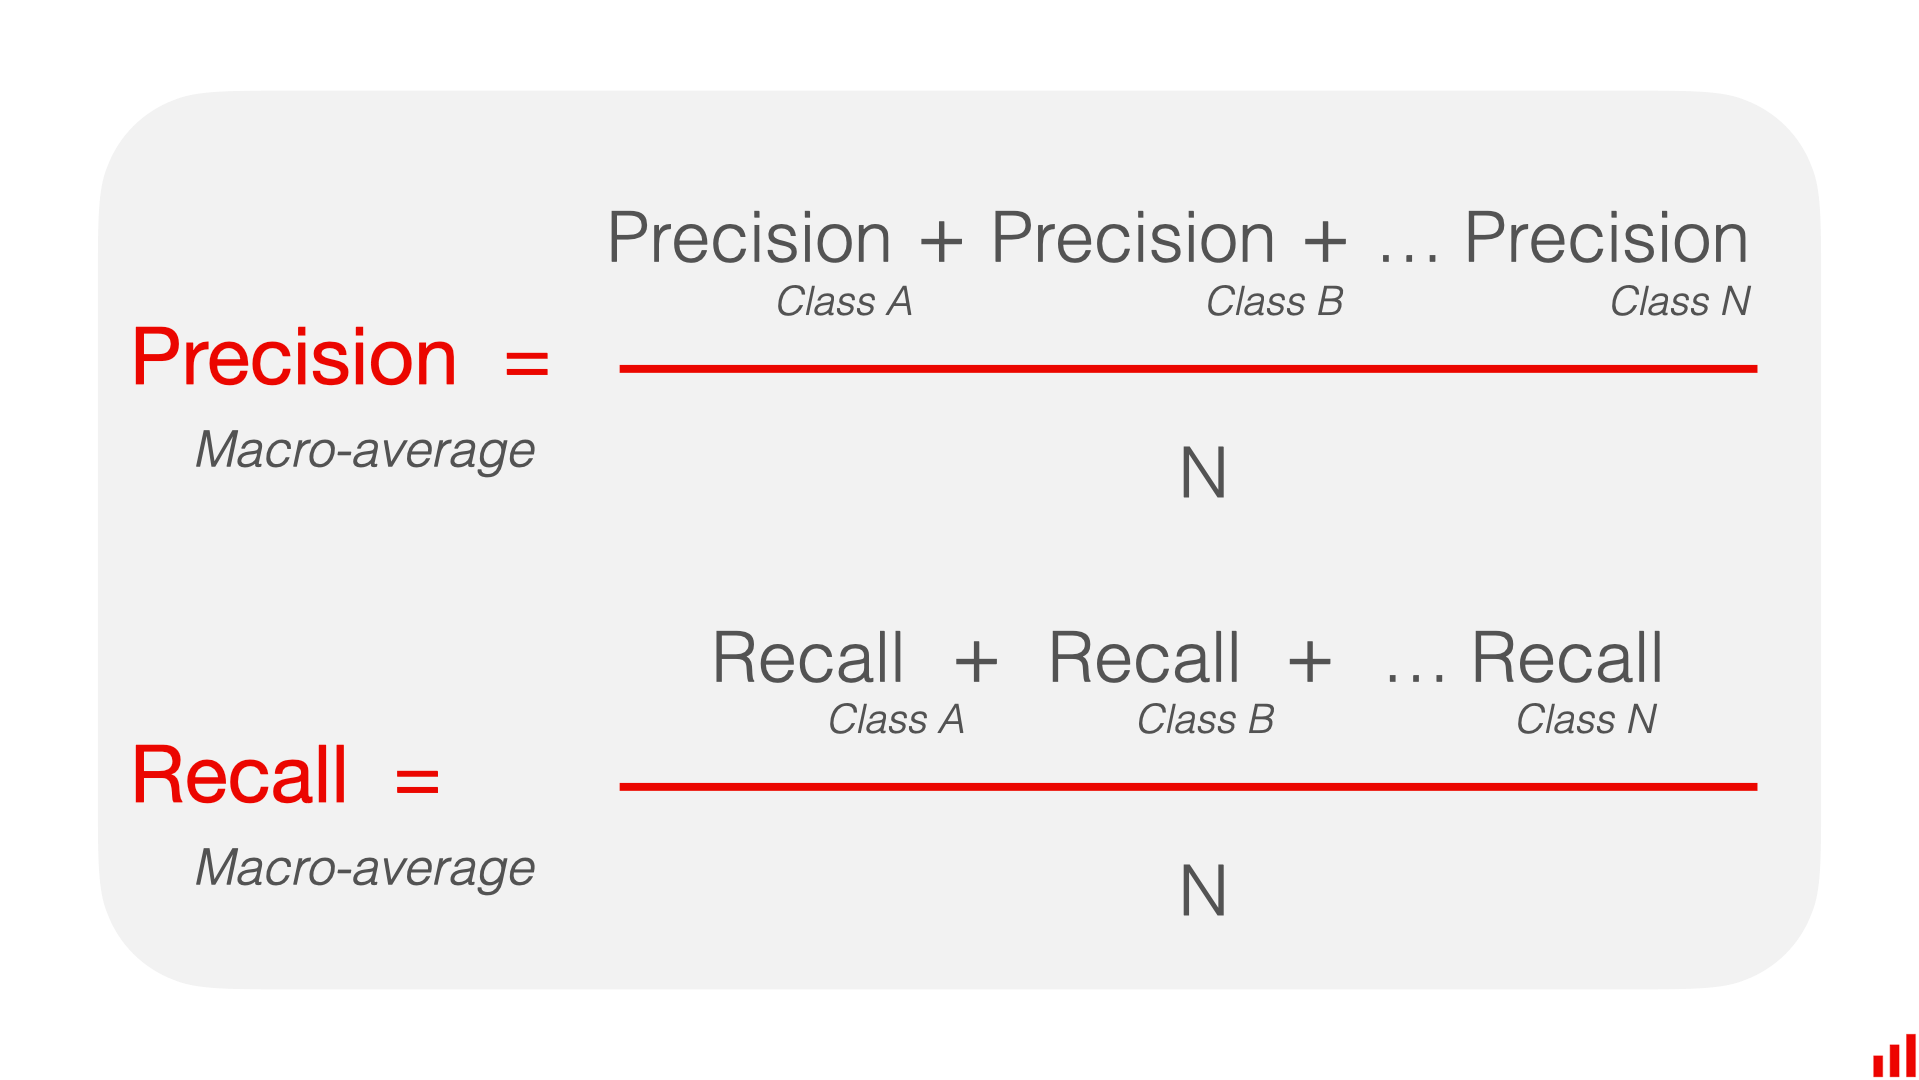

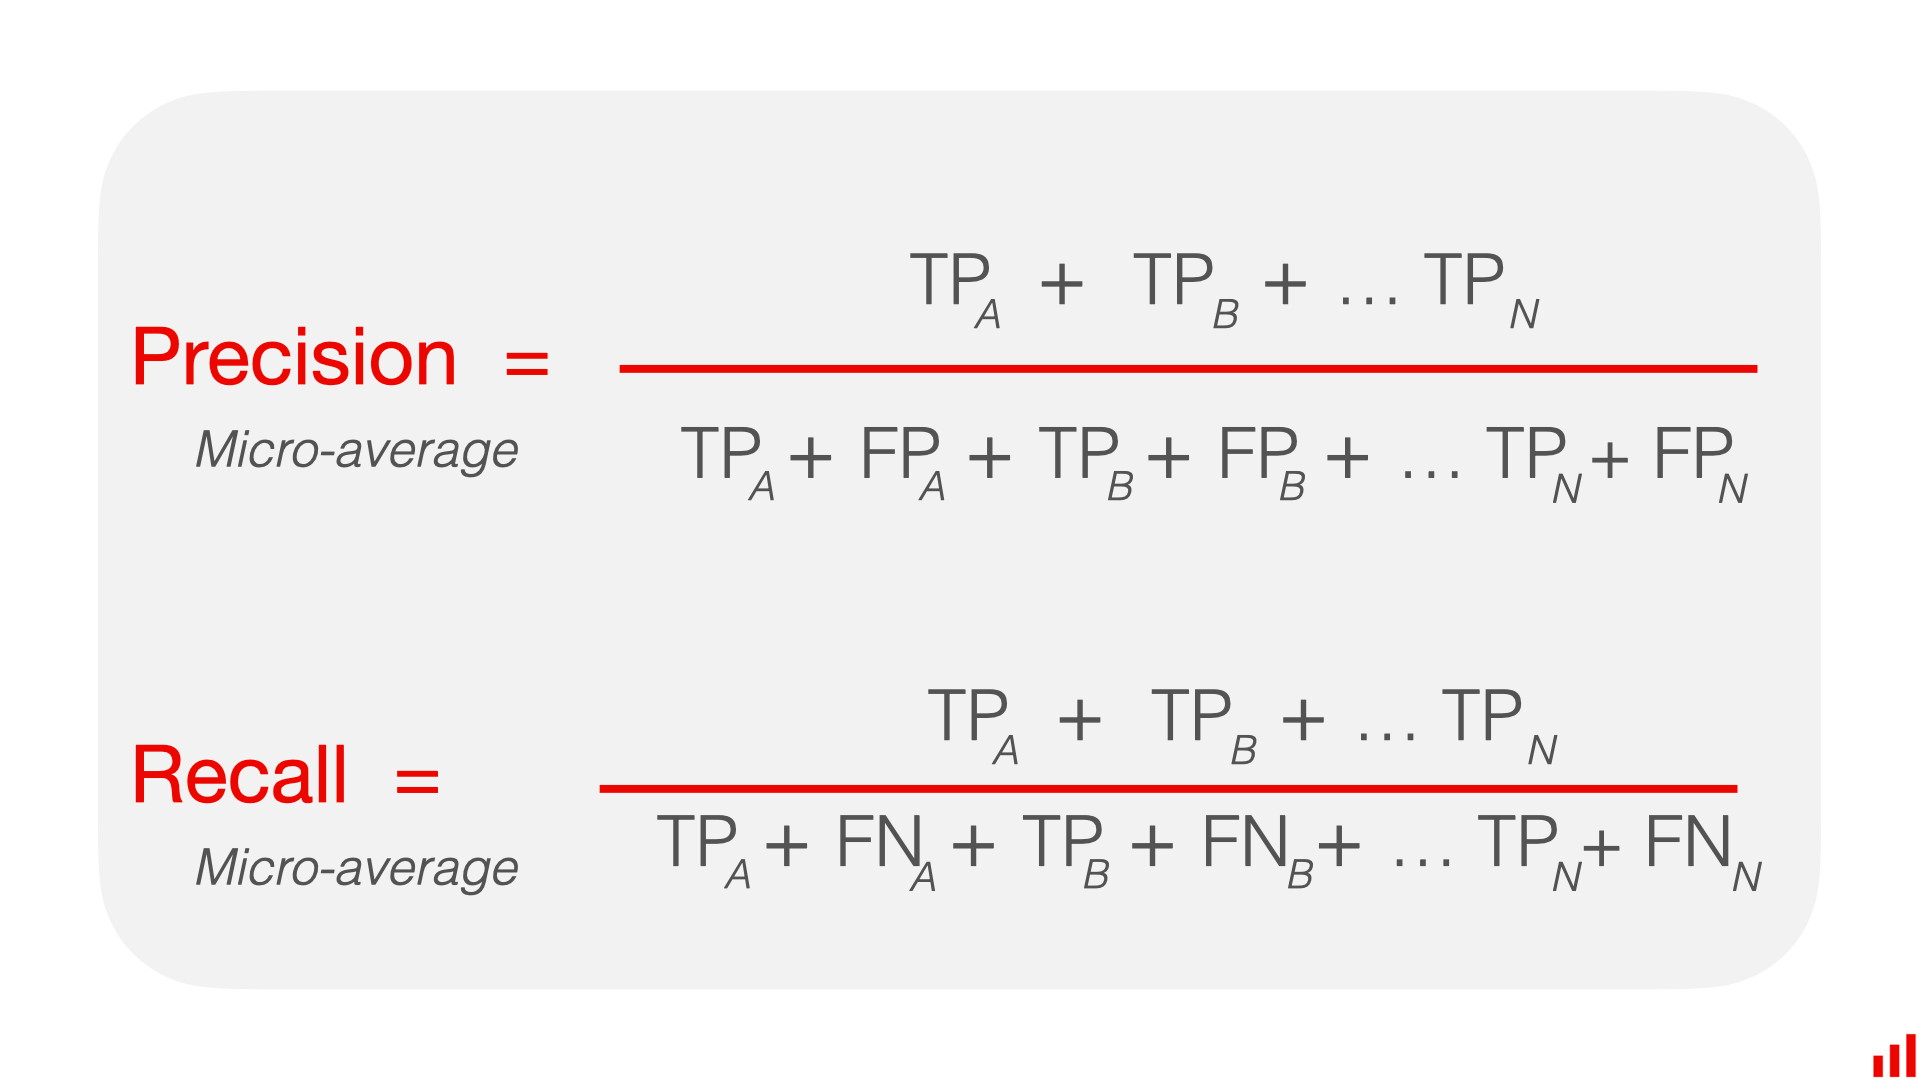

In [85]:
from sklearn.metrics import classification_report

y_pred = (model(X_test) > 0.5).to(int).detach().numpy()
y_ture = (y_test.to(int)).detach().numpy()
print(classification_report(y_ture, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.76      0.87        17
           2       0.84      1.00      0.91        21

   micro avg       0.92      0.92      0.92        50
   macro avg       0.95      0.92      0.93        50
weighted avg       0.93      0.92      0.92        50
 samples avg       0.92      0.92      0.92        50



# [3] Классикация текста

## [3.1] TF-iDF векторизация

### [3.1.1] Анализ данных

In [86]:
# Скачаем демо-датасет
import nltk

nltk.download("movie_reviews", download_dir="movie_reviews")

[nltk_data] Downloading package movie_reviews to movie_reviews...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [87]:
# Cоберём корпус в DataFrame
from pathlib import Path

import pandas as pd

paths = list(Path("movie_reviews").glob("**/*.txt"))
df = pd.DataFrame(
    [{"text": path.read_text("utf-8"), "label": path.parent.name} for path in paths]
)
df.head()

,text,label
0,"okay , bear with me y'all , cause first off i ...",neg
1,one of my favorite songs by the stranglers inc...,neg
2,five years after his directorial debut based o...,neg
3,"synopsis : original "" jurassic park "" survivor...",neg
4,"phew , what a mess ! \nfor his fifth collabora...",neg


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [89]:
# train_test_split
partition = round(0.7 * len(df))
df_shuffled = df.sample(frac=1, random_state=42)

train_df = df_shuffled.iloc[:partition]
test_df = df_shuffled.iloc[partition:]

train_texts, train_labels = train_df["text"], train_df["label"]
test_texts, test_labels = test_df["text"], test_df["label"]

In [90]:
# simple tokenizer
import re


def tokenize(texts, lower=True, token_pattern=r"(?i)\b[a-z]{2,}\b") -> pd.Series:
    texts = pd.Series(texts)
    if lower:
        texts = texts.str.lower()
    tokenizer = re.compile(token_pattern)
    return texts.apply(tokenizer.findall)


train_texts_tokenized = tokenize(train_texts)
train_texts_tokenized

1860    [being, the, self, proclaimed, professional, f...
353     [after, falling, down, hoped, that, joel, schu...
1333    [roberto, benigni, is, clown, in, the, traditi...
905     [to, put, it, bluntly, ed, wood, would, have, ...
1289    [elmore, leonard, has, quickly, become, one, o...
                              ...                        
1917    [no, film, in, recent, has, left, me, with, su...
753     [america, sweethearts, has, an, intriguing, pr...
498     [pseudo, intellectual, film, about, the, pseud...
1276    [garry, shandling, makes, his, long, overdue, ...
1325    [most, movies, seem, to, release, third, movie...
Name: text, Length: 1400, dtype: object

### [3.1.2] Ручное решение

In [91]:
def word_counter(texts_tokenized) -> pd.DataFrame:
    term_counts = pd.DataFrame(columns=["doc", "term", "count"])

    for i, text_tokenized in enumerate(texts_tokenized):
        terms, counts = np.unique(text_tokenized, return_counts=True)
        df_counts = pd.DataFrame({"doc": i, "term": terms, "count": counts})
        term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

    return term_counts


train_term_counts = word_counter(train_texts_tokenized)
train_term_counts.head()

,doc,term,count
0,0,able,1
1,0,about,3
2,0,absolutely,1
3,0,academy,1
4,0,actor,1


$$
TF(t, d) = \frac{\text{count of t in d}}{\text{count of all terms in d}}
$$
$$
IDF(t) = \log \frac{\text{count of all docs}}{1+(\text{count of docs with t})} 
$$
$$
TF\_IDF(t, d) = TD(t, d) \cdot IDF(t)
$$


In [92]:
def get_tf_idf(term_counts: pd.DataFrame, smooth_idf=True) -> dict:
    term_counts = term_counts.copy()

    count_of_t_in_d = term_counts["count"].values
    count_of_terms_in_d = (
        term_counts.groupby("doc").sum()["count"][term_counts["doc"]].values
    )
    term_counts["tf"] = count_of_t_in_d / count_of_terms_in_d

    count_of_all_docs = term_counts["doc"].nunique()
    count_of_docs_with_t = (
        term_counts.groupby("term")["doc"].nunique()[term_counts["term"]].values
    )
    # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
    if smooth_idf:
        term_counts["idf"] = (
            np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
        )
    else:
        term_counts["idf"] = np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1

    term_counts["tfidf"] = term_counts["tf"] * term_counts["idf"]
    return term_counts


smooth_idf = False
train_tf_idf = get_tf_idf(train_term_counts, smooth_idf=smooth_idf)
train_tf_idf.head()

,doc,term,count,tf,idf,tfidf
0,0,able,1,0.001923,2.931022,0.005637
1,0,about,3,0.005769,1.293413,0.007462
2,0,absolutely,1,0.001923,3.508029,0.006746
3,0,academy,1,0.001923,4.201176,0.008079
4,0,actor,1,0.001923,2.485326,0.004779


In [93]:
# vocabulary = train_term_counts['term'].unique()
# vocabulary
tf_idf_transform = train_tf_idf.drop_duplicates("term").set_index("term")["idf"]
tf_idf_transform

term
able           2.931022
about          1.293413
absolutely     3.508029
academy        4.201176
actor          2.485326
                 ...   
pities         8.244228
rhymes         8.244228
smocky         8.244228
stallion       8.244228
thunderlips    8.244228
Name: idf, Length: 33599, dtype: float64

In [103]:
vocabulary = train_term_counts["term"].unique()
example = ["big big bang"]
x = pd.Series(tokenize(example)[0])
x = x[x.isin(vocabulary)]
x = tf_idf_transform[x].groupby("term").sum()
x

term
bang    5.411014
big     4.226002
Name: idf, dtype: float64

In [100]:
from scipy.sparse import csr_array


class TfIdfVectorizer:
    def __init__(
        self, token_pattern=r"(?i)\b[a-z]{2,}\b", lower=True, smooth_idf=False
    ):
        self.token_pattern = token_pattern
        self.lower = lower
        self.smooth_idf = False
        self.vocab = []
        self.df_ = pd.DataFrame()

    # simple tokenizer
    def tokenize(self, texts: list[str]) -> pd.Series:
        # TODO: [torch.tensor([vocab[w] for w in map(normalize, tokenize(text)) if w in vocab]) for text in corpus]
        texts = pd.Series(texts)
        if self.lower:
            texts = texts.str.lower()
        tokenizer = re.compile(self.token_pattern)
        return texts.apply(tokenizer.findall)

    # let's count the words
    def word_counter(self, texts_tokenized) -> pd.DataFrame:
        term_counts = pd.DataFrame(columns=["doc", "term", "count"], dtype=int)

        for i, text_tokenized in enumerate(texts_tokenized):
            terms, counts = np.unique(text_tokenized, return_counts=True)
            df_counts = pd.DataFrame({"doc": i, "term": terms, "count": counts})
            term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

        return term_counts

    def get_tf_idf(self, term_counts: pd.DataFrame) -> dict:
        term_counts = term_counts.copy()

        count_of_t_in_d = term_counts["count"].values
        count_of_terms_in_d = (
            term_counts.groupby("doc")["count"].sum()[term_counts["doc"]].values
        )
        term_counts["tf"] = count_of_t_in_d / count_of_terms_in_d

        count_of_all_docs = term_counts["doc"].nunique()
        count_of_docs_with_t = (
            term_counts.groupby("term")["doc"].nunique()[term_counts["term"]].values
        )
        # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
        if self.smooth_idf:
            term_counts["idf"] = (
                np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
            )
        else:
            term_counts["idf"] = (
                np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1
            )

        term_counts["tfidf"] = term_counts["tf"] * term_counts["idf"]
        return term_counts

    def fit(self, texts: list[str]):
        x = self.tokenize(texts)
        x = self.word_counter(x)

        self.vocab = x["term"].unique()
        self.vocab_id = pd.Series(np.arange(self.vocab.size), index=self.vocab)

        self.tf_idf_ = self.get_tf_idf(x)
        self.idf_ = self.tf_idf_.drop_duplicates("term").set_index("term")["idf"]

    def transform(self, texts: list[str]):
        # TODO:
        # i, c = x.unique(return_counts=True)
        # torch.sparse_coo_tensor([torch.zeros_like(i), i], (idf[i] * c), (1, idf.shape[0]))

        x = self.tokenize(texts)
        x = self.word_counter(x)
        x = x[x["term"].isin(self.vocab)]

        row = x["doc"].values
        col = self.vocab_id[x["term"]].values
        data = self.idf_[x["term"]].values * x["count"].values

        res = csr_array((data, (row, col)), shape=(len(texts), self.vocab.size))
        return res


v = TfIdfVectorizer()
v.fit(train_texts)

In [104]:
example = ["big big bang", "big bang"]
res = v.transform(example)
res[res != 0]

array([4.22600205, 5.41101417, 2.11300103, 5.41101417])

### [3.1.3] Scikit-learn решение

In [105]:
# Решение в 1 функцию
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    smooth_idf=smooth_idf, norm=None, token_pattern=r"(?i)\b[a-z]{2,}\b"
).fit(train_texts)

In [106]:
vocabulary_ = pd.Series(tfidf.vocabulary_).sort_index()
res_series = pd.Series(tfidf.transform(example).toarray()[0], index=vocabulary_.index)
res_series[res_series > 0]

bang    5.411014
big     4.226002
dtype: float64

In [107]:
# Решение в виде пайплайна
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

vocabulary = train_term_counts["term"].unique()
pipe = Pipeline(
    [
        ("count", CountVectorizer(vocabulary=vocabulary)),
        ("tfid", TfidfTransformer(smooth_idf=smooth_idf, norm=None)),
    ]
).fit(train_texts)

In [108]:
res_sparse2 = pipe.transform(example)  # .toarray()
res_sparse2[res_sparse2 > 0]

matrix([[4.22600205, 5.41101417, 2.11300103, 5.41101417]])

In [109]:
res_series2 = pd.Series(pipe.transform(example).toarray()[0], index=vocabulary)
res_series2[res_series2 > 0]

big     4.226002
bang    5.411014
dtype: float64

In [110]:
# Сравнение результатов
sklearn_idf = tfidf.idf_[vocabulary_[vocabulary].values]
pipe_idf = pipe["tfid"].idf_
trained_idf = train_tf_idf.drop_duplicates("term")["idf"]

print("Число несовпадений:", (sklearn_idf != trained_idf).sum())

Число несовпадений: 0


In [111]:
count_matrix = train_tf_idf.set_index(["doc", "term"])["count"].unstack(fill_value=0)[
    vocabulary
]
count_matrix

term,able,about,absolutely,academy,actor,actors,admit,after,again,against,...,vibrates,adrianne,entertaning,hulk,meredith,pities,rhymes,smocky,stallion,thunderlips
doc,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,1,1,1,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,4,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,3,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## [3.2] Пайплайн классификации

### [3.2.1] Обработка датасета

In [112]:
# Cоберём корпус в DataFrame
from pathlib import Path

import nltk
import pandas as pd

nltk.download("movie_reviews", download_dir="movie_reviews", quiet=True)
corpus_list = list(Path("movie_reviews").glob("**/*.txt"))
df = pd.DataFrame(
    [
        {"text": path.read_text("utf-8"), "label": path.parent.name}
        for path in corpus_list
    ]
)
df.head()

,text,label
0,"okay , bear with me y'all , cause first off i ...",neg
1,one of my favorite songs by the stranglers inc...,neg
2,five years after his directorial debut based o...,neg
3,"synopsis : original "" jurassic park "" survivor...",neg
4,"phew , what a mess ! \nfor his fifth collabora...",neg


In [113]:
# Объединим обработку текста в пайплайн
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

nltk.download(["punkt", "stopwords", "omw-1.4", "wordnet"], quiet=True)

# tokenize = word_tokenize
tokenize = RegexpTokenizer(pattern=r"(?i)\b[a-z]{2,}\b").tokenize

stop_words = set(stopwords.words("english"))

normalize = SnowballStemmer("english").stem
# normalize = WordNetLemmatizer().lemmatize


def text_preproc(text):
    return " ".join(normalize(w) for w in tokenize(text) if w not in stop_words)


print("before:\t", df["text"][1][:100])
print("after:\t", text_preproc(df["text"][1])[:100])

before:	 one of my favorite songs by the stranglers includes the lyric , " you'd better watch out for the ski
after:	 one favorit song strangler includ lyric better watch skin deep like extend warn watch skin deep what


In [114]:
# Разделим на Train и Test
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"], df["label"], random_state=42
)

tfidf = TfidfVectorizer(preprocessor=text_preproc).fit(train_texts)

X_train, X_test = map(tfidf.transform, [train_texts, test_texts])
y_train, y_test = map(lambda y: (y == "pos").values + 0, [train_labels, test_labels])

### [3.2.2] Обучение модели

[Документация по моделям sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [115]:
from sklearn.metrics import classification_report

In [116]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
print(f"train acc: {clf.score(X_train, y_train):.2f}")
print(f"test acc:  {clf.score(X_test, y_test):.2f}")

train acc: 0.98
test acc:  0.80


In [117]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
print(f"train acc: {clf.score(X_train, y_train):.2f}")
print(f"test acc:  {clf.score(X_test, y_test):.2f}")

train acc: 1.00
test acc:  0.81


In [118]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
print(f"train acc: {clf.score(X_train, y_train):.2f}")
print(f"test acc:  {clf.score(X_test, y_test):.2f}")

train acc: 1.00
test acc:  0.82


In [119]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
print(f"train acc: {clf.score(X_train, y_train):.2f}")
print(f"test acc:  {clf.score(X_test, y_test):.2f}")

train acc: 1.00
test acc:  0.78


In [120]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print(f"train acc: {clf.score(X_train, y_train):.2f}")
print(f"test acc:  {clf.score(X_test, y_test):.2f}")

train acc: 0.98
test acc:  0.78


In [121]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       232
           1       0.82      0.75      0.78       268

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500

